$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{maximize}}
& & f(x) \\
& \text{subject to}
& & g_i(x) \leq b_i, \; i = 1, \ldots, m.\\
\end{aligned}
\end{equation*}
$

In [1]:
import scipy.stats

Text(0, 0.5, '尤度')

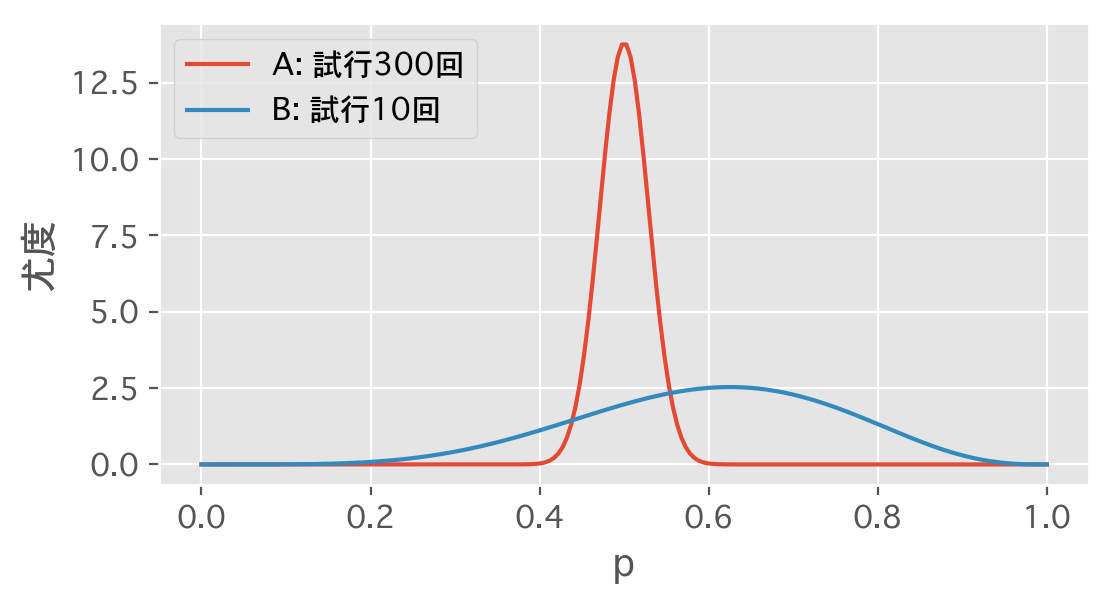

In [80]:
X = np.linspace(0, 1, 200)
plt.figure(figsize=(6, 3))
plt.plot(X, scipy.stats.beta.pdf(X, 150, 150), label='A: 試行300回')
plt.plot(X, scipy.stats.beta.pdf(X, 6, 4), label='B: 試行10回')
plt.legend(loc='upper left')
plt.xlabel('p')
plt.ylabel('尤度')
#plt.title('パラメータpの尤度\n Beta(成功回数, 失敗回数)')

Text(0, 0.5, '尤度')

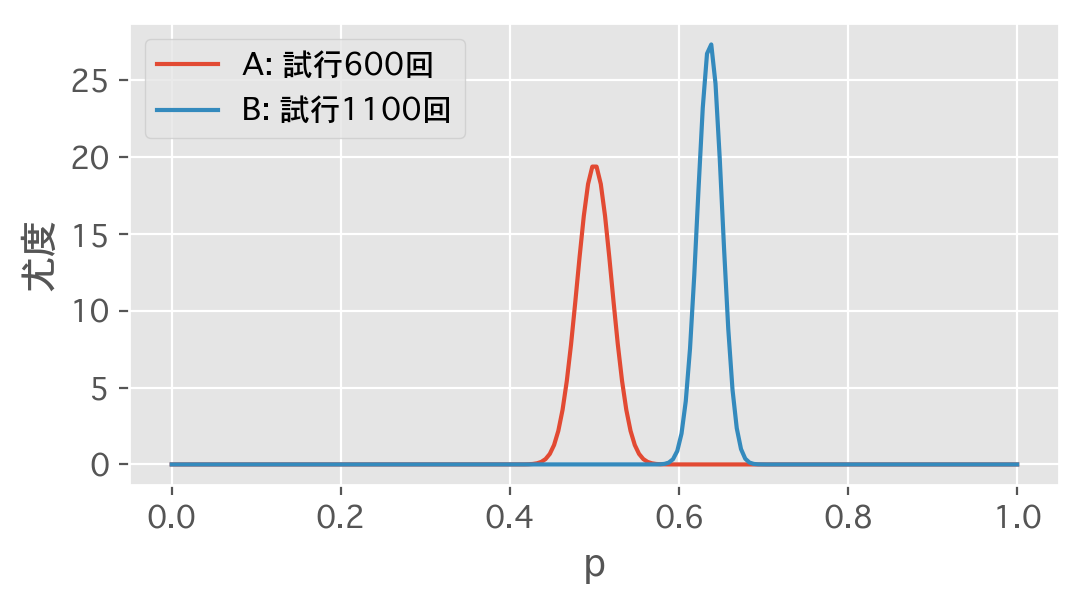

In [89]:
X = np.linspace(0, 1, 200)
plt.figure(figsize=(6, 3))
plt.plot(X, scipy.stats.beta.pdf(X, 300, 300), label='A: 試行600回')
plt.plot(X, scipy.stats.beta.pdf(X, 700, 400), label='B: 試行1100回')
plt.legend(loc='upper left')
plt.xlabel('p')
plt.ylabel('尤度')
#plt.title('パラメータpの尤度\n Beta(成功回数, 失敗回数)')

$
y = w_0 + w_1x_1 + w_2x_2 \cdots + \epsilon
$

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
import pandas as pd
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y = pd.Series(boston.target)

In [70]:
import statsmodels.api as sm
model = sm.OLS(y, X[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX']])
result = model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.946    
Dependent Variable: y                AIC:                3196.9303
Date:               2019-04-04 00:40 BIC:                3230.7426
No. Observations:   506              Log-Likelihood:     -1590.5  
Df Model:           8                F-statistic:        1110.    
Df Residuals:       498              Prob (F-statistic): 8.68e-312
R-squared:          0.947            Scale:              31.960   
--------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
CRIM     -0.1858     0.0380   -4.8884   0.0000    -0.2605    -0.1111
ZN        0.0833     0.0146    5.7100   0.0000     0.0546     0.1119
CHAS      3.8725     1.0130    3.8227   0.0001     1.8821     5.8629
NOX     -18.5928     3.0070   -6.1833   0.0000   -24.5007   -12.6849

In [23]:
import pulp

$\displaystyle
\begin{equation*}
\begin{aligned}
& \underset{x,y,z}{\text{maximize}}
& 1800x + 2500y + 3000z \\
& \text{subject to}
& 6x + 10y + 15z \leq 12000 \\
& & x \leq 1000; y \leq 900;z \leq 500 
\end{aligned}
\end{equation*}
$

In [24]:
# Variable
products = [pulp.LpVariable(f'{v}', cat=pulp.LpInteger, lowBound=0) for v in ['X', 'Y', 'Z']]
# Target
problem = pulp.LpProblem(sense=pulp.LpMaximize)
problem += pulp.lpDot(products, [1800, 2500, 3000])
# Constraints
problem += pulp.lpDot(products, [6, 10, 15]) <= 200 * 60
problem += products[0] <= 1000
problem += products[1] <= 900
problem += products[2] <= 500

status = problem.solve()
print(pulp.LpStatus[status])
print([f"{product.name}: {product.value()}" for product in products])

Optimal
['X: 1000.0', 'Y: 600.0', 'Z: 0.0']


In [25]:
1000 * 1800 + 600 * 2500

3300000